<a href="https://colab.research.google.com/github/mujtaba86/presentation/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Decision Tree CODE  using intrusion dataset) ----------

# Step 1: Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Step 2: Load the intrusion dataset
intrusion_df = pd.read_csv('Intrusion dataset.csv')






In [ ]:
# Step 3: Encode categorical columns
label_enc = LabelEncoder()
intrusion_df['protocol_type'] = label_enc.fit_transform(intrusion_df['protocol_type'])
intrusion_df['encryption_used'] = label_enc.fit_transform(intrusion_df['encryption_used'])
intrusion_df['browser_type'] = label_enc.fit_transform(intrusion_df['browser_type'])

In [ ]:
# Step 4: Select features and target
X = intrusion_df[['network_packet_size', 'session_duration', 'ip_reputation_score', 'login_attempts']]
y = intrusion_df['attack_detected']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 7: Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy of the Decision Tree model: 0.63
Confusion Matrix:
[[1020  556]
 [ 503  783]]
F1 Score: 0.6305503822591623


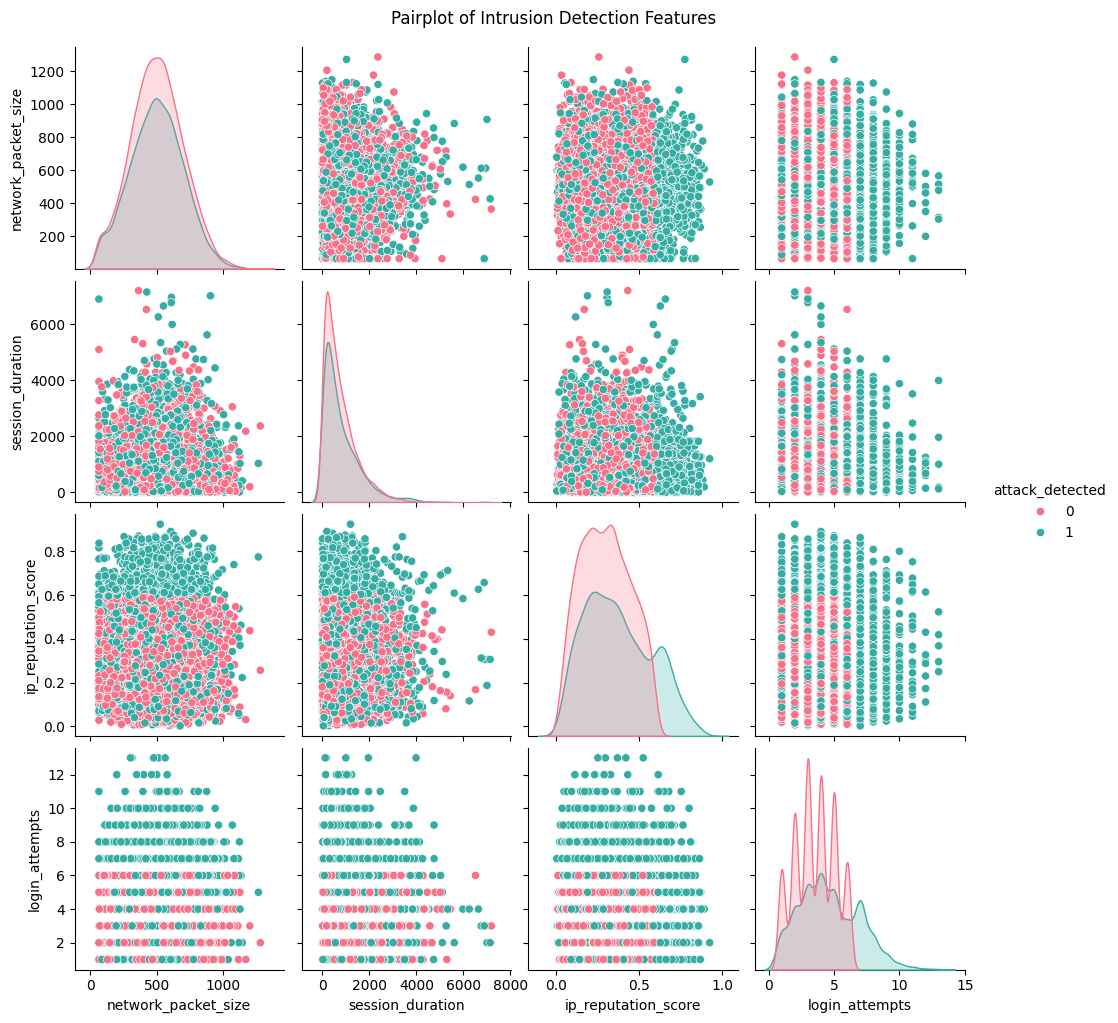

In [ ]:
sns.pairplot(intrusion_df[['network_packet_size', 'session_duration', 'ip_reputation_score', 'login_attempts', 'attack_detected']],
             hue='attack_detected', diag_kind='kde', palette='husl')

plt.suptitle("Pairplot of Intrusion Detection Features", y=1.02)
plt.show()

In [ ]:


# Save Decision Tree model
joblib.dump(clf, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0 

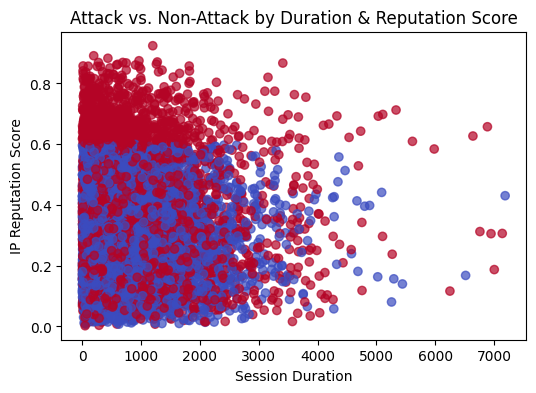

In [ ]:
#KNN CODE

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Step 2: Load the intrusion dataset
intrusion_df = pd.read_csv('Intrusion dataset.csv')

# Step 3: Quick Data Exploration
print(intrusion_df.head())
print(intrusion_df['attack_detected'].value_counts())

# Step 4: Encode categorical features
label_enc = LabelEncoder()
intrusion_df['protocol_type'] = label_enc.fit_transform(intrusion_df['protocol_type'])
intrusion_df['encryption_used'] = label_enc.fit_transform(intrusion_df['encryption_used'])
intrusion_df['browser_type'] = label_enc.fit_transform(intrusion_df['browser_type'])

# Step 5: Select features and labels
X_int = intrusion_df[['network_packet_size', 'login_attempts']]
y_int = intrusion_df['attack_detected']

# Step 6: Split the dataset
Xint_train, Xint_test, yint_train, yint_test = train_test_split(X_int, y_int, test_size=0.2, random_state=42)

# Step 7: Train KNN Classifier
knn_int = KNeighborsClassifier(n_neighbors=5)
knn_int.fit(Xint_train, yint_train)

# Step 8: Predict and Evaluate
yint_pred = knn_int.predict(Xint_test)
print("Intrusion classification report (KNN):")
print(classification_report(yint_test, yint_pred))
print("Confusion matrix:\n", confusion_matrix(yint_test, yint_pred))

#prediction
plt.figure(figsize=(6, 4))
plt.scatter(intrusion_df['session_duration'], intrusion_df['ip_reputation_score'],
            c=intrusion_df['attack_detected'],
            cmap='coolwarm', alpha=0.7)

plt.xlabel('Session Duration')
plt.ylabel('IP Reputation Score')
plt.title('Attack vs. Non-Attack by Duration & Reputation Score')
plt.show()


In [ ]:
# Save KNN model
joblib.dump(clf, 'knn_model.pkl')

['knn_model.pkl']

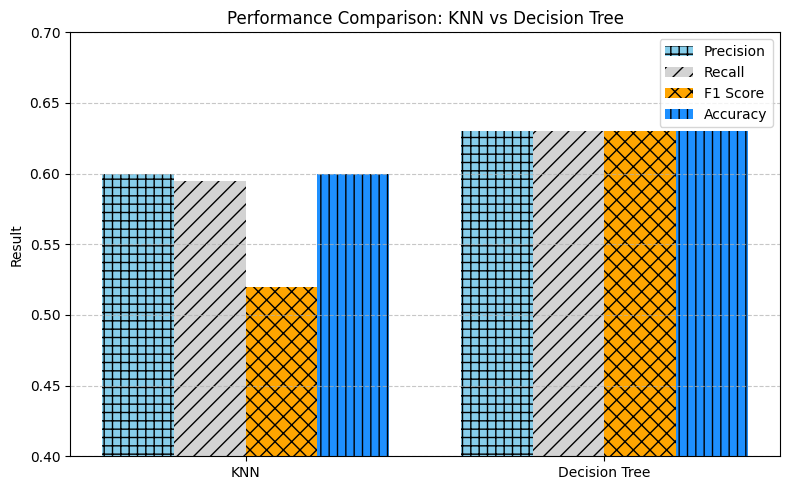

In [ ]:
# Labels for our two implemented models
models = ['KNN', 'Decision Tree']

# KNN: Accuracy=0.60, F1 Score=0.52, Recall (avg)=0.595, Precision (avg)=0.60
# Decision Tree: Accuracy=0.63, F1 Score=0.63, Recall (avg)=0.63, Precision (avg)=0.63

precision = [0.60, 0.63]
recall =    [0.595, 0.63]
fscore =    [0.52, 0.63]
accuracy =  [0.60, 0.63]

x = np.arange(len(models))
width = 0.2

# Plot grouped bars
plt.figure(figsize=(8, 5))
plt.bar(x - 1.5*width, precision, width, label='Precision', hatch='++', color='skyblue')
plt.bar(x - 0.5*width, recall, width, label='Recall', hatch='//', color='lightgray')
plt.bar(x + 0.5*width, fscore, width, label='F1 Score', hatch='xx', color='orange')
plt.bar(x + 1.5*width, accuracy, width, label='Accuracy', hatch='||', color='dodgerblue')

plt.ylabel('Result')
plt.ylim(0.4, 0.7)
plt.title('Performance Comparison: KNN vs Decision Tree')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()